## Introduction to Machine Learning

### Supervised Learning Algorithms
* Decision Trees
* Multi-layer perceptron
* k-NN

#### Final Project - wine quality classification problem

In [1967]:
# Importing the libraries
# generic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [1968]:
# Utilities
def data_scaler(data):
    scaler = preprocessing.MinMaxScaler()
    data = scaler.fit_transform(data)
    return data
def quality_labeller(data, bins=(2.9,5.9,8), labels=None):
    if labels is None:
        labels = ['bad', 'good']
    df_quality = pd.cut(data['quality'],
                           bins = bins,
                           labels = labels)
    data.loc[:,'quality_label'] = df_quality
    return data
def delete_radomly_x(data, x=0.1):
    # get dimensions of df
    nrows, ncols = data.shape

    volume = nrows * ncols                    # total number of entries in data
    volume_to_be_nan = int(volume * x)      # number of entries to turn to NaN (10 %)

    # randomly generate index locations for the new NaNs
    indices = np.random.randint(volume, size=volume_to_be_nan)
    row_indices = indices % nrows
    col_indices = (indices / nrows).astype(int)

    # assign NaN to each of the indices in data
    for ri, ci in zip(row_indices, col_indices):
      data.iloc[ri, ci] = np.nan

##### Read Red Wine

In [1969]:
df_red = pd.read_csv("winequality-red.csv")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###### Analysing

In [1970]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [1971]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###### Delete data 10 and 20%

In [1972]:
delete_radomly_x(df_red)
df_red.isna().sum()

fixed acidity           149
volatile acidity        160
citric acid             141
residual sugar          144
chlorides               139
free sulfur dioxide     155
total sulfur dioxide    160
density                 186
pH                      149
sulphates               147
alcohol                 145
quality                 144
dtype: int64

* strategy 1 - Deleting Rows

In [1973]:
df_red.dropna(inplace=True)
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1974]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 2 to 1590
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         484 non-null    float64
 1   volatile acidity      484 non-null    float64
 2   citric acid           484 non-null    float64
 3   residual sugar        484 non-null    float64
 4   chlorides             484 non-null    float64
 5   free sulfur dioxide   484 non-null    float64
 6   total sulfur dioxide  484 non-null    float64
 7   density               484 non-null    float64
 8   pH                    484 non-null    float64
 9   sulphates             484 non-null    float64
 10  alcohol               484 non-null    float64
 11  quality               484 non-null    float64
dtypes: float64(12)
memory usage: 49.2 KB


* strategy 2 - Replacing With Mean

In [1975]:
# restore data
df_red = pd.read_csv("winequality-red.csv")
# delete 20%
delete_radomly_x(df_red, 0.2)
df_red.isna().sum()

fixed acidity           320
volatile acidity        266
citric acid             277
residual sugar          265
chlorides               273
free sulfur dioxide     312
total sulfur dioxide    316
density                 286
pH                      286
sulphates               289
alcohol                 299
quality                 273
dtype: int64

In [1976]:
for column in df_red.columns:
    mean = df_red[column].mean()
    df_red[column] = df_red[column].replace(np.NaN, mean)
df_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1977]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


<AxesSubplot:>

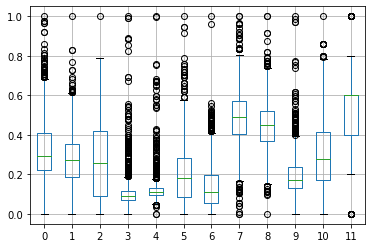

In [1978]:
# restore data
df_red = pd.read_csv("winequality-red.csv")
# normalize to detect outliers
min_max_scaler = preprocessing.MinMaxScaler()
df_red_scaled = pd.DataFrame(data_scaler(df_red.values))
df_red_scaled.boxplot()

In [1979]:
#columns
i = 0
for column in df_red.columns:
    print(f'{i}: {column}',end=',')
    i += 1

0: fixed acidity,1: volatile acidity,2: citric acid,3: residual sugar,4: chlorides,5: free sulfur dioxide,6: total sulfur dioxide,7: density,8: pH,9: sulphates,10: alcohol,11: quality,

* we don't have missing values (null cases)
* there are some outliers that means data < 25th and > 75th

###### Data cleaning

Z-score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

A z-score can be placed on a normal distribution curve. Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). In order to use a z-score, you need to know the mean μ and also the population standard deviation σ.

In [1980]:
# remove outliers
z_scores = zscore(df_red)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_red_new = df_red[filtered_entries]
df_red_new.shape

(1451, 12)

###### Data normalization

In [1981]:
x = df_red_new.iloc[:,:-1]
y = df_red_new.iloc[:,-1]
df_x = pd.DataFrame(data_scaler(x.values), columns=df_red.columns[:-1])
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.282353,0.630435,0.000000,0.127273,0.202128,0.217391,0.201439,0.588785,0.724138,0.277108,0.176471
1,0.329412,0.826087,0.000000,0.254545,0.319149,0.521739,0.438849,0.495327,0.367816,0.421687,0.254902
2,0.329412,0.695652,0.050633,0.200000,0.287234,0.304348,0.345324,0.514019,0.436782,0.385542,0.254902
3,0.729412,0.173913,0.708861,0.127273,0.196809,0.347826,0.388489,0.607477,0.321839,0.301205,0.254902
4,0.282353,0.630435,0.000000,0.127273,0.202128,0.217391,0.201439,0.588785,0.724138,0.277108,0.176471
...,...,...,...,...,...,...,...,...,...,...,...
1446,0.141176,0.521739,0.101266,0.145455,0.276596,0.673913,0.273381,0.317757,0.655172,0.301205,0.392157
1447,0.105882,0.467391,0.126582,0.181818,0.127660,0.826087,0.323741,0.338318,0.735632,0.518072,0.529412
1448,0.152941,0.423913,0.164557,0.200000,0.202128,0.608696,0.244604,0.396262,0.620690,0.506024,0.490196
1449,0.105882,0.570652,0.151899,0.145455,0.196809,0.673913,0.273381,0.371028,0.793103,0.457831,0.333333


In [1982]:
df_y = pd.DataFrame(y)
# df_y

In [1983]:
qualities = ['quality', 'quality_label']
df_y_s = quality_labeller(df_y)
df_y = df_y_s.iloc[:,-1]
df_y_s

,quality,quality_label
0,5,bad
1,5,bad
2,5,bad
3,6,good
4,5,bad
...,...,...
1594,5,bad
1595,6,good
1596,6,good
1597,5,bad


###### Splitting data

In [1984]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size = 0.2,random_state = 0)

In [1985]:
print(f'Training set has {x_train.shape[0]} samples')
print(f'Testing set has {x_test.shape[0]} samples')

Training set has 1160 samples
Testing set has 291 samples


###### Decision Trees

In [1986]:
decision_tree = DecisionTreeClassifier(random_state = 0)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)

In [1987]:
decision_tree_report = classification_report(y_test, y_pred_decision_tree, output_dict=True)
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

         bad       0.69      0.66      0.67       128
        good       0.74      0.76      0.75       163

    accuracy                           0.72       291
   macro avg       0.71      0.71      0.71       291
weighted avg       0.72      0.72      0.72       291



<AxesSubplot:>

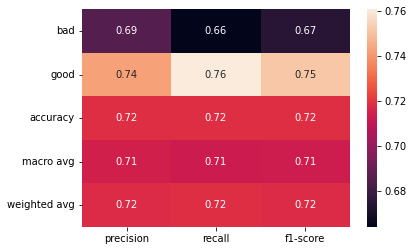

In [1988]:
sns.heatmap(pd.DataFrame(decision_tree_report).iloc[:-1, :].T, annot=True)

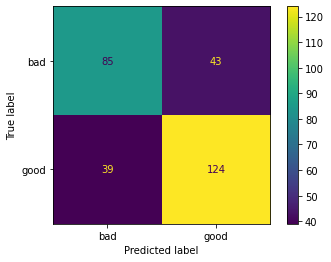

In [1989]:
cm = confusion_matrix(y_test, y_pred_decision_tree, labels=['bad', 'good'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot()
plt.show()

###### Multi-layer perceptron

In [1990]:
mlp_classifier = MLPClassifier(max_iter=1000)
mlp_classifier.fit(x_train, y_train)
y_pred_mlp = mlp_classifier.predict(x_test)

In [1991]:
mlp_report = classification_report(y_test, y_pred_mlp, output_dict=True)
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         bad       0.69      0.75      0.72       128
        good       0.79      0.74      0.76       163

    accuracy                           0.74       291
   macro avg       0.74      0.74      0.74       291
weighted avg       0.75      0.74      0.74       291



<AxesSubplot:>

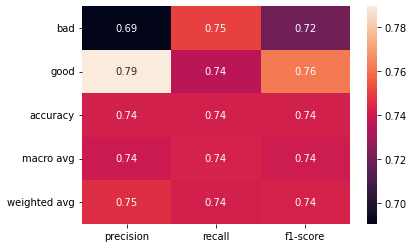

In [1992]:
sns.heatmap(pd.DataFrame(mlp_report).iloc[:-1, :].T, annot=True)

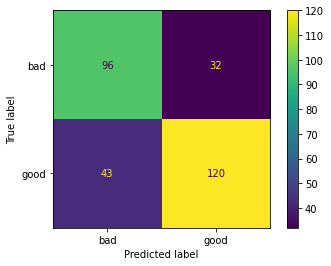

In [1993]:
cm = confusion_matrix(y_test, y_pred_mlp, labels=['bad', 'good'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot()
plt.show()

###### k-NN

In [1994]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [1995]:
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         bad       0.67      0.62      0.65       128
        good       0.72      0.75      0.74       163

    accuracy                           0.70       291
   macro avg       0.69      0.69      0.69       291
weighted avg       0.70      0.70      0.70       291



<AxesSubplot:>

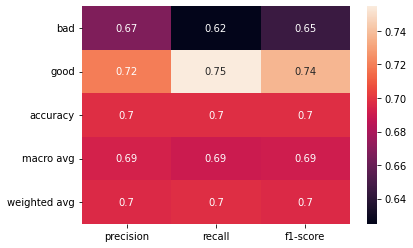

In [1996]:
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)

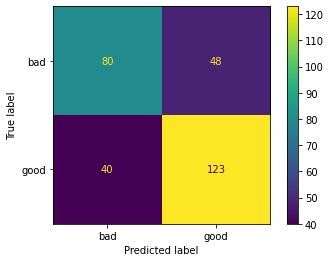

In [1997]:
cm = confusion_matrix(y_test, y_pred_knn, labels=['bad', 'good'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot()
plt.show()






























##### Read White Wine

In [1998]:
df_white = pd.read_csv("winequality-white.csv")
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


###### Analysing

In [1999]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [2000]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [2001]:
df_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [2002]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

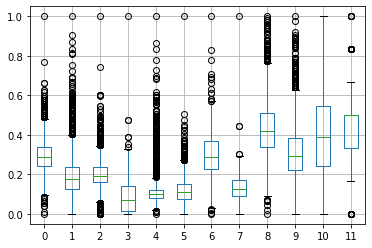

In [2003]:
# normalize to detect outliers
min_max_scaler = preprocessing.MinMaxScaler()
df_white_scaled = pd.DataFrame(data_scaler(df_white.values))
df_white_scaled.boxplot()

In [2004]:
#columns
i = 0
for column in df_white.columns:
    print(f'{i}: {column}',end=',')
    i += 1

0: fixed acidity,1: volatile acidity,2: citric acid,3: residual sugar,4: chlorides,5: free sulfur dioxide,6: total sulfur dioxide,7: density,8: pH,9: sulphates,10: alcohol,11: quality,

* we don't have missing values (null cases)
* there are some outliers that means data < 25th and > 75th

###### Data cleaning

In [2005]:
# remove outliers
z_scores = zscore(df_white)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_white_new = df_white[filtered_entries]
df_white_new.shape

(4487, 12)

###### Data normalization

In [2006]:
x = df_white_new.iloc[:,:-1]
y = df_white_new.iloc[:,-1]
df_x = pd.DataFrame(data_scaler(x.values), columns=df_white.columns[:-1])
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.530612,0.38,0.521739,0.995050,0.336735,0.511905,0.623431,0.935354,0.247059,0.377049,0.068966
1,0.387755,0.44,0.492754,0.049505,0.377551,0.142857,0.464435,0.463973,0.600000,0.442623,0.189655
2,0.755102,0.40,0.579710,0.311881,0.387755,0.333333,0.317992,0.538047,0.552941,0.360656,0.293103
3,0.571429,0.30,0.463768,0.391089,0.469388,0.535714,0.690377,0.571717,0.470588,0.295082,0.258621
4,0.571429,0.30,0.463768,0.391089,0.469388,0.535714,0.690377,0.571717,0.470588,0.295082,0.258621
...,...,...,...,...,...,...,...,...,...,...,...
4482,0.367347,0.26,0.420290,0.049505,0.275510,0.261905,0.297071,0.271380,0.564706,0.459016,0.482759
4483,0.448980,0.48,0.521739,0.366337,0.357143,0.654762,0.615063,0.524579,0.423529,0.393443,0.206897
4484,0.428571,0.32,0.275362,0.029703,0.295918,0.333333,0.376569,0.365657,0.235294,0.393443,0.172414
4485,0.224490,0.42,0.434783,0.024752,0.102041,0.214286,0.372385,0.106397,0.647059,0.262295,0.758621


In [2007]:
df_y = pd.DataFrame(y)
# df_y

In [2008]:
qualities = ['quality', 'quality_label']
qualities_labels = ['bad', 'good']
df_y_s = quality_labeller(df_y, labels=qualities_labels)
df_y = df_y_s.iloc[:,-1]
df_y_s

,quality,quality_label
0,6,good
1,6,good
2,6,good
3,6,good
4,6,good
...,...,...
4893,6,good
4894,5,bad
4895,6,good
4896,7,good


###### Splitting data

In [2009]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size = 0.2,random_state = 0)

In [2010]:
print(f'Training set has {x_train.shape[0]} samples')
print(f'Testing set has {x_test.shape[0]} samples')

Training set has 3589 samples
Testing set has 898 samples


###### Decision Trees

In [2011]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)

In [2012]:
decision_tree_report = classification_report(y_test, y_pred_decision_tree, output_dict=True)
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

         bad       0.72      0.64      0.68       297
        good       0.83      0.88      0.85       601

    accuracy                           0.80       898
   macro avg       0.78      0.76      0.77       898
weighted avg       0.79      0.80      0.80       898



<AxesSubplot:>

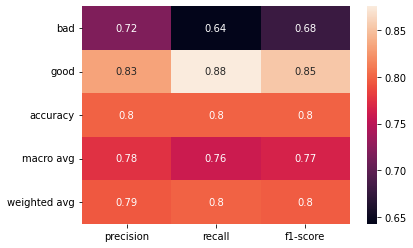

In [2013]:
sns.heatmap(pd.DataFrame(decision_tree_report).iloc[:-1, :].T, annot=True)

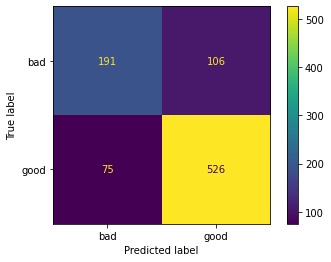

In [2014]:
cm = confusion_matrix(y_test, y_pred_decision_tree, labels=qualities_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=qualities_labels)
disp.plot()
plt.show()

###### Multi-layer perceptron

In [2015]:
mlp_classifier = MLPClassifier(max_iter=1000)
mlp_classifier.fit(x_train, y_train)
y_pred_mlp = mlp_classifier.predict(x_test)

In [2016]:
mlp_report = classification_report(y_test, y_pred_mlp, output_dict=True)
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         bad       0.67      0.51      0.58       297
        good       0.78      0.88      0.83       601

    accuracy                           0.76       898
   macro avg       0.73      0.69      0.70       898
weighted avg       0.75      0.76      0.75       898



<AxesSubplot:>

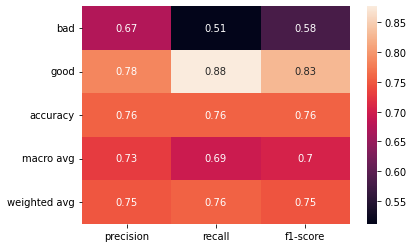

In [2017]:
sns.heatmap(pd.DataFrame(mlp_report).iloc[:-1, :].T, annot=True)

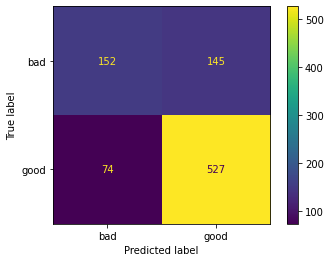

In [2018]:
cm = confusion_matrix(y_test, y_pred_mlp, labels=qualities_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=qualities_labels)
disp.plot()
plt.show()

###### k-NN

In [2019]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [2020]:
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         bad       0.69      0.56      0.62       297
        good       0.80      0.87      0.84       601

    accuracy                           0.77       898
   macro avg       0.74      0.72      0.73       898
weighted avg       0.76      0.77      0.76       898



<AxesSubplot:>

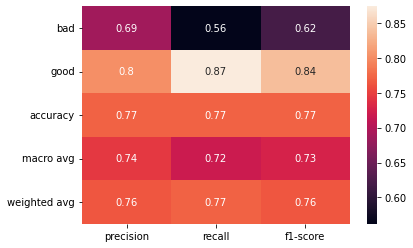

In [2021]:
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, annot=True)

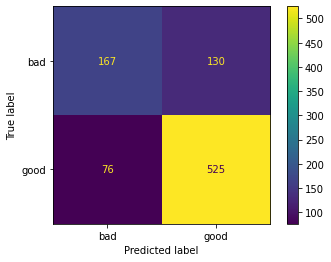

In [2022]:
cm = confusion_matrix(y_test, y_pred_knn, labels=qualities_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=qualities_labels)
disp.plot()
plt.show()